## Importing Dependencies

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier 
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

## Loading Dataset

In [2]:
data = pd.read_csv('/kaggle/input/telecom-cust-churn-data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Quick Glancing the Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [5]:
data['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [6]:
data['Partner'].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

In [7]:
data['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [8]:
data['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

## Handling Outliers 


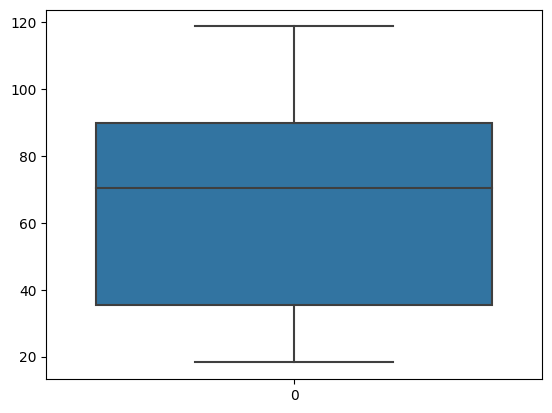

In [9]:
sns.boxplot(data['MonthlyCharges'])
plt.show()

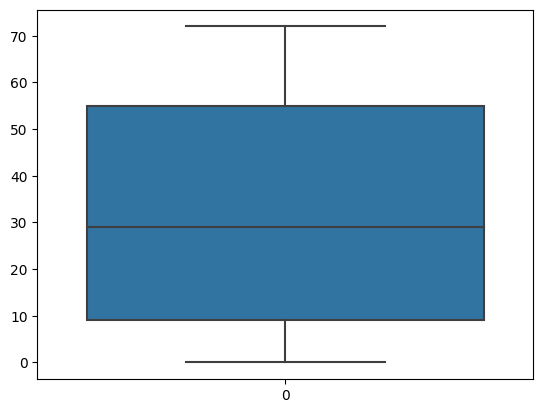

In [10]:
sns.boxplot(data['tenure'])
plt.show()

## Data Visualization 

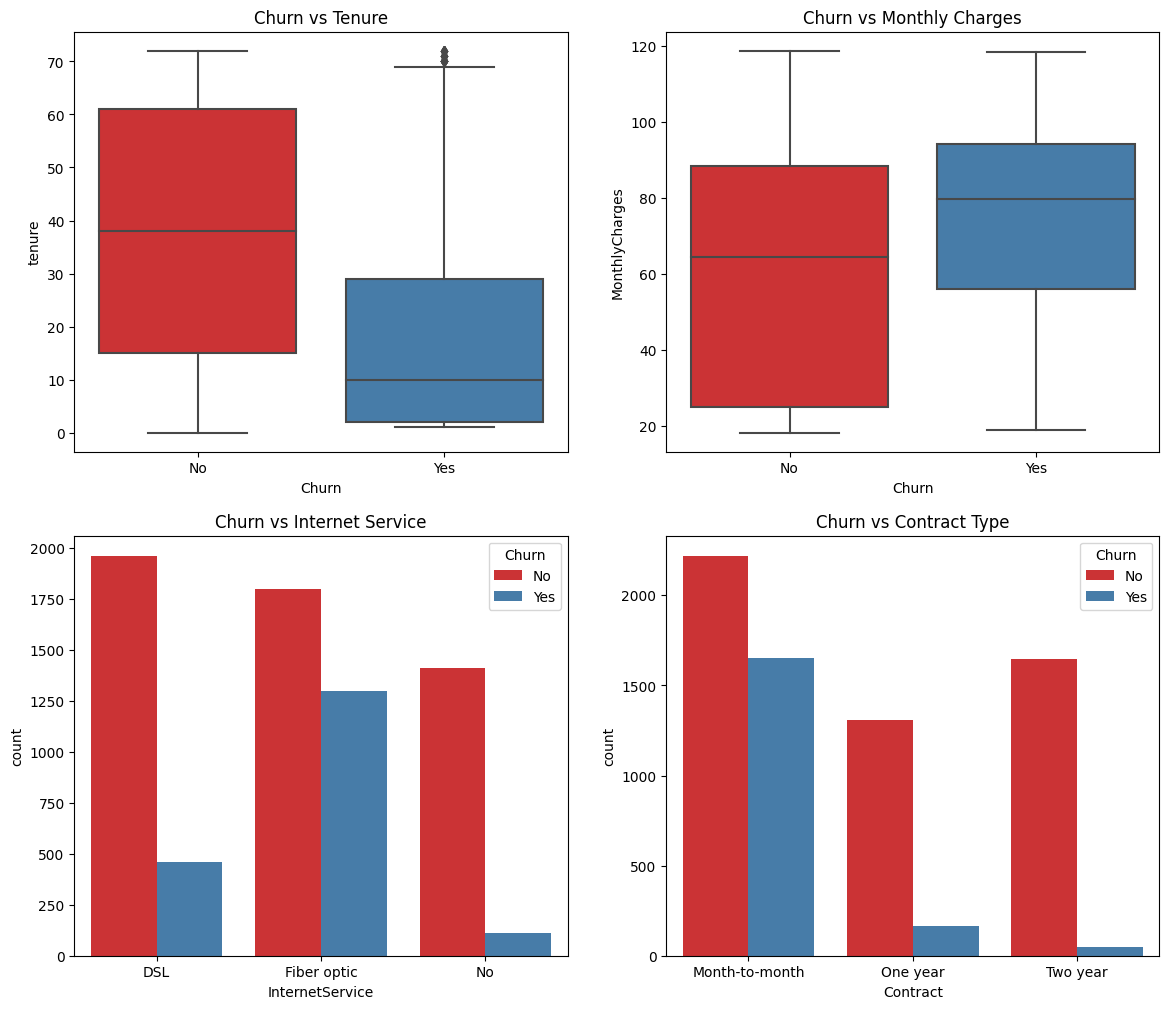

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Churn vs. Tenure
sns.boxplot(data=data, x='Churn', y='tenure', palette='Set1', ax=axes[0, 0])
axes[0, 0].set_title('Churn vs Tenure')

# Churn vs. MonthlyCharges
sns.boxplot(data=data, x='Churn', y='MonthlyCharges', palette='Set1', ax=axes[0, 1])
axes[0, 1].set_title('Churn vs Monthly Charges')

# Churn vs. Internet Service
sns.countplot(data=data, x='InternetService', hue='Churn', palette='Set1', ax=axes[1, 0])
axes[1, 0].set_title('Churn vs Internet Service')

# Churn vs. Contract Type
sns.countplot(data=data, x='Contract', hue='Churn', palette='Set1', ax=axes[1, 1])
axes[1, 1].set_title('Churn vs Contract Type')

plt.show()


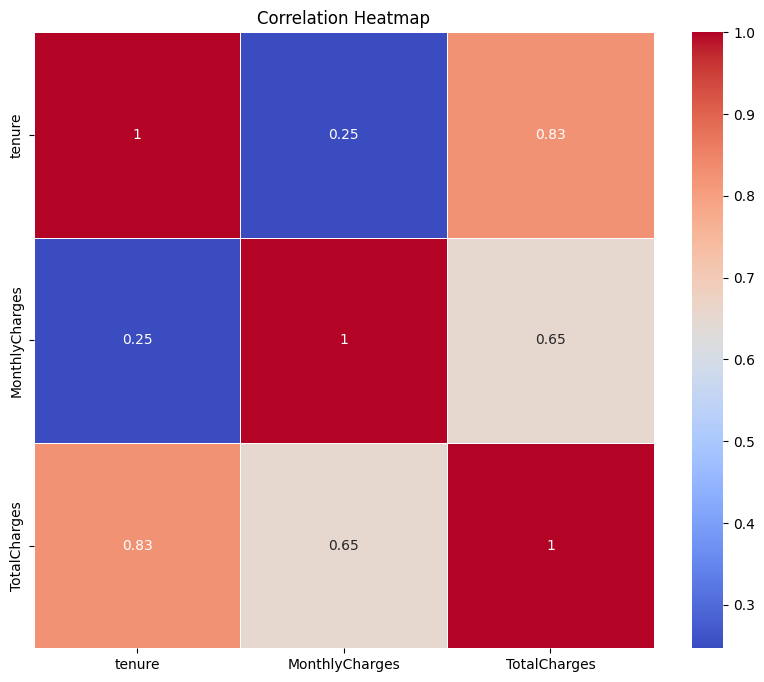

In [12]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data = data.dropna()

plt.figure(figsize=(10, 8))
sns.heatmap(data[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Data Preprocessing

In [13]:
numerical_features = data[['tenure', 'MonthlyCharges', 'TotalCharges']]

In [14]:
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

## Scaling numeric data

In [15]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(numerical_features)
numerical_features_scaled = pd.DataFrame(scaled_data, columns=numerical_features.columns)

numerical_features_scaled.head()

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457


## Encoding Categorical Data

In [16]:
label_encoders = {}
for columns in categorical_features: 
    le = LabelEncoder()
    data[columns] = le.fit_transform(data[columns])
    label_encoders[columns] = le

label_encoders

{'gender': LabelEncoder(),
 'SeniorCitizen': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder(),
 'Churn': LabelEncoder()}

In [17]:
data[['tenure', 'MonthlyCharges', 'TotalCharges']] = numerical_features_scaled[['tenure', 'MonthlyCharges', 'TotalCharges']]
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,-1.280248,0,1,0,0,...,0,0,0,0,0,1,2,-1.161694,-0.994194,0
1,5575-GNVDE,1,0,0,0,0.064303,1,0,0,2,...,2,0,0,0,1,0,3,-0.260878,-0.173740,0
2,3668-QPYBK,1,0,0,0,-1.239504,1,0,0,2,...,0,0,0,0,0,1,3,-0.363923,-0.959649,1
3,7795-CFOCW,1,0,0,0,0.512486,0,1,0,2,...,2,2,0,0,1,0,0,-0.747850,-0.195248,0
4,9237-HQITU,0,0,0,0,-1.239504,1,0,1,0,...,0,0,0,0,0,1,2,0.196178,-0.940457,1


## Splitting into Train and Test

In [18]:
X = data.drop(columns=['customerID', 'Churn'])
y = data['Churn']

In [19]:
data['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [20]:
ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X, y)

print(X_resampled.shape, y_resampled.shape)

(10326, 19) (10326,)


In [21]:
X_resampled = X_resampled.fillna(0)
X_resampled.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8260, 19) (2066, 19) (8260,) (2066,)


## Training Diff Models

In [23]:
# Logistic regression 
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)
#cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
y_train_pred1 = cross_val_predict(log_reg, X_train, y_train, cv=3)

f1_score(y_train, y_train_pred1)

0.760235240895725

In [24]:
# Random Forrest Classifier
forest_clf = RandomForestClassifier()

forest_clf.fit(X_train, y_train)
#cross_val_score(forest_clf, X_train, y_train, cv=3, scoring='accuracy')
y_train_pred2 = cross_val_predict(forest_clf, X_train, y_train, cv=3)

f1_score(y_train, y_train_pred2)

0.8571103526734926

In [25]:
# KNN Classifier
knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train, y_train)
#cross_val_score(knn_clf, X_train, y_train, cv=3, scoring='accuracy')
y_train_pred3 = cross_val_predict(knn_clf, X_train, y_train, cv=3)

f1_score(y_train, y_train_pred3)

0.7603250584437271

In [26]:
# Gradient Boosting Classifier 
gradient_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1e-4, max_depth=3)

gradient_clf.fit(X_train, y_train)
#cross_val_score(gradient_clf, X_train, y_train, cv=3, scoring='accuracy')
y_train_pred4 = cross_val_predict(gradient_clf, X_train, y_train, cv=3)

f1_score(y_train, y_train_pred4)

0.7611804767309875

In [27]:
# XGBoost Clasifier
xgboost_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=1e-4, max_depth=3)

xgboost_clf.fit(X_train, y_train)
#cross_val_scores = cross_val_score(xgboost_clf, X_train, y_train, cv=3, scoring='accuracy')
y_train_pred5 = cross_val_predict(xgboost_clf, X_train, y_train, cv=3)

f1_score(y_train, y_train_pred5)

0.7611889306457124

## Random forest is getting better result from the rest....So lets fine tune the model and then evaluate the test set 

In [28]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=forest_clf, param_grid=param_grid, cv=5, verbose=1)

In [29]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [30]:
print('best parameter: ', grid_search.best_params_)
print('best score: ', grid_search.best_score_)

best parameter:  {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
best score:  0.8630750605326876


## Predicting on the Test Set 

In [31]:
best_forest = grid_search.best_estimator_

test_predictions = best_forest.predict(X_test)

In [32]:
f1_score(y_test, test_predictions)

0.8901943063714414

In [35]:
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, test_predictions)
print("Cross-validated Accuracy: ", accuracy)

Cross-validated Accuracy:  0.8823814133591481
